In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [10]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [11]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [12]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [13]:
# due to some strings value in the column it is an object column but still yo want to convert it into numeric value
# use pd.to_numeric and suppress the error and covert to nan

In [14]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

In [15]:
df['packed_cell_volume'].dtype

dtype('float64')

In [16]:
df['packed_cell_volume'].unique()


array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [17]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [18]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [19]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [20]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [21]:
df['white_blood_cell_count'].dtype

dtype('float64')

In [22]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [23]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [24]:
cat_col = [col for col in df.columns if df[col].dtype=='object']

In [25]:
num_col = [col for col in df.columns if df[col].dtype!='object']

In [26]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [27]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [28]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [29]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [30]:
#replace unwanted values

df['diabetes_mellitus'].replace(to_replace={' yes': 'yes', '\tyes': 'yes', '\tno': 'no'}, inplace=True)

In [31]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [32]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [33]:
# df['coronary_artery_disease'].replace(to_replace= {'\tno': 'no'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace= '\tno', value= 'no')

In [34]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [35]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [36]:
# df['class'].replace(to_replace={'ckd': 1, 'ckd\t': 1, 'notckd': 0}, inplace=True)
# df['class'] = df['class'].replace(to_replace= 'ckd', value='1',.......)

df['class'] = df['class'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 1})

In [37]:
df['class'].unique()

array([1, 0], dtype=int64)

In [38]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [1 0] values



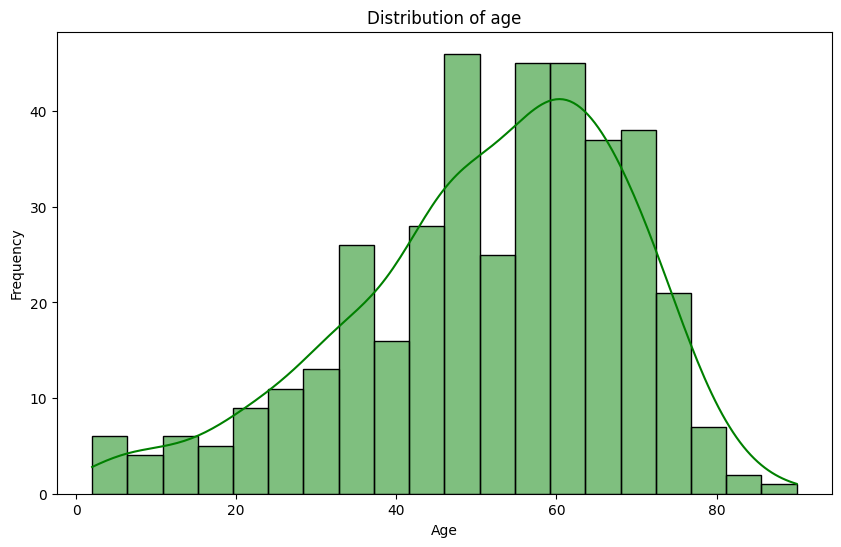

In [39]:
#Univariate analysis

plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=20, color='green')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [40]:
#insighst>> dist of age is right skewed


In [41]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

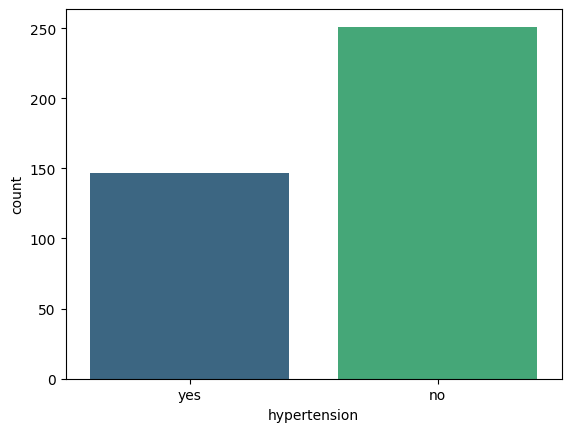

In [42]:
sns.countplot(x='hypertension', data=df, palette='viridis')

In [43]:
#150 of them has hypertension


In [44]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='blood_urea'>

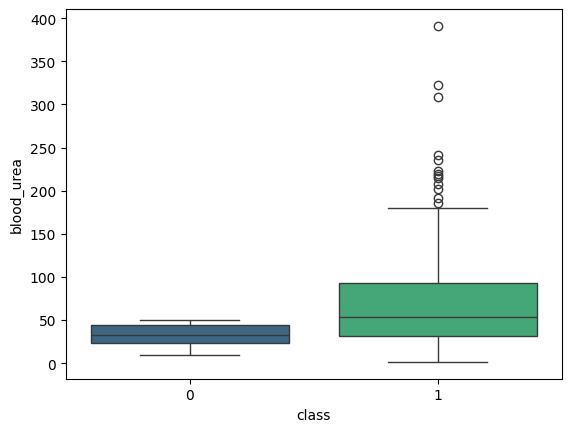

In [45]:
sns.boxplot(x='class', y='blood_urea', data=df, palette='viridis')

In [46]:
# insights >> people with kidney disease has higher blood urea with outliers, median value is also higher

<Axes: xlabel='class', ylabel='serum_creatinine'>

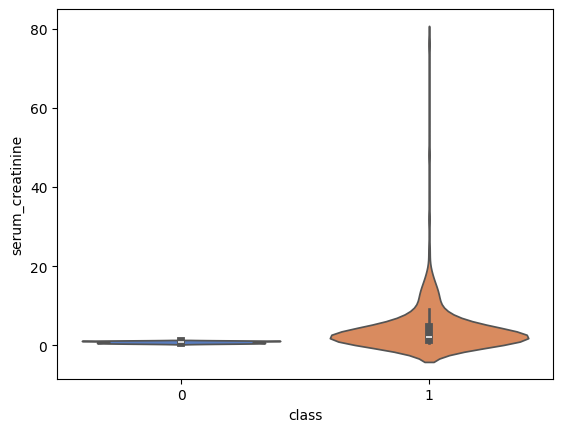

In [47]:
sns.violinplot(x='class', y='serum_creatinine', data=df, palette='muted')

In [48]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

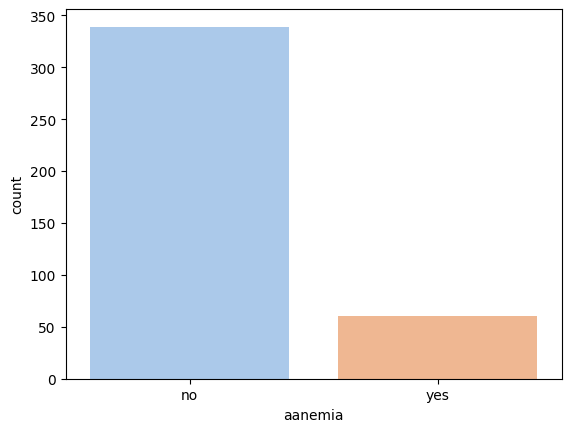

In [49]:
# people suffering from aanemia
sns.countplot(x='aanemia',data=df, palette='pastel')

In [50]:
# insights >> majority of people is not suffering from anaemia

In [51]:
df.appetite.value_counts()

appetite
good    317
poor     82
Name: count, dtype: int64

<Axes: ylabel='count'>

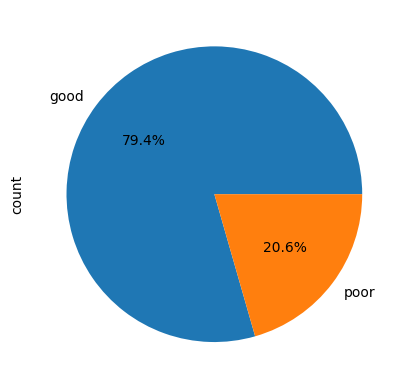

In [52]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

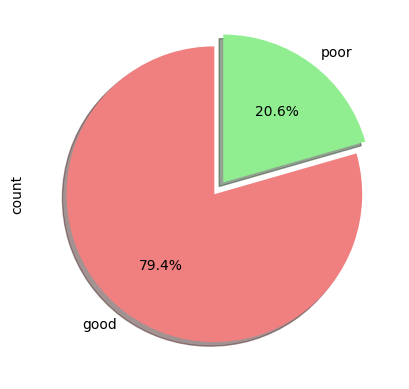

In [53]:
# lets make pie chart more beatiful
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors=['lightcoral', 'lightgreen'], explode= (0, 0.1), startangle=90 ,shadow=True)

In [54]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [55]:
df['pus_cell_clumps']

0      notpresent
1      notpresent
2      notpresent
3         present
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: pus_cell_clumps, Length: 400, dtype: object

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

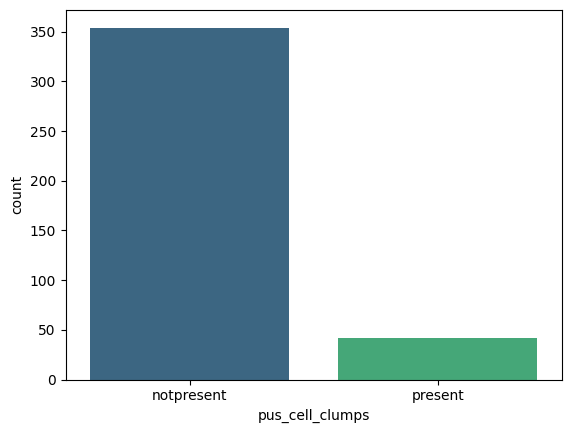

In [56]:
sns.countplot(x='pus_cell_clumps', data=df, palette='viridis')

In [57]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

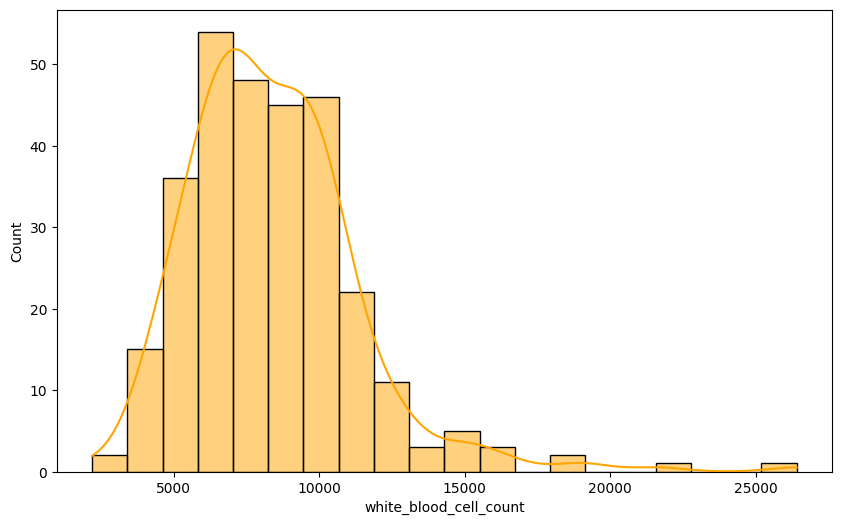

In [58]:
# white_blood_cell_count
plt.figure(figsize=(10,6))
sns.histplot(x='white_blood_cell_count', data=df, kde=True, bins=20, color='orange')

In [59]:

df['diabetes_mellitus']

0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: diabetes_mellitus, Length: 400, dtype: object

In [60]:
df['diabetes_mellitus']


0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: diabetes_mellitus, Length: 400, dtype: object

In [61]:
df['diabetes_mellitus'].value_counts()

diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

<Axes: ylabel='count'>

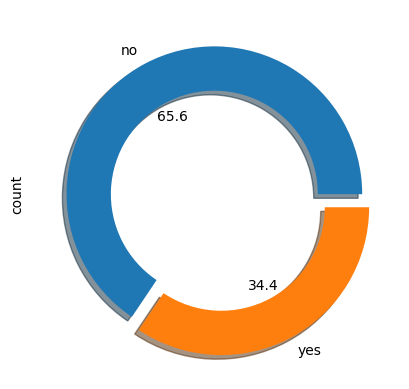

In [62]:
# donut plot >> or ring chart. It is like a pie chart but there is a hole in center
# by specifying the wedgeprops value 

df['diabetes_mellitus'].value_counts().plot.pie(autopct='%1.1f', wedgeprops= dict(width=0.3), shadow=True, explode=(0, 0.1))


In [63]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [64]:
df['coronary_artery_disease']

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: coronary_artery_disease, Length: 400, dtype: object

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

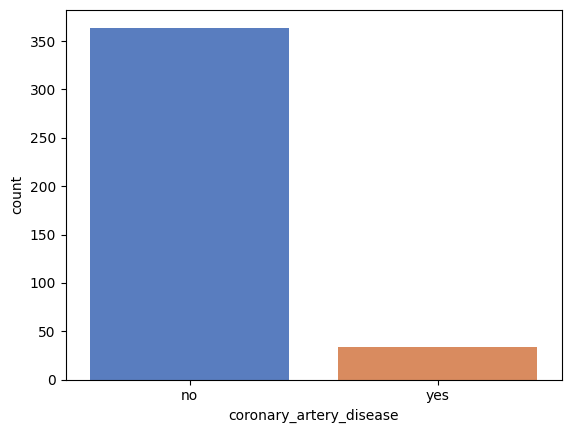

In [65]:
sns.countplot(x=df['coronary_artery_disease'], palette='muted')

In [66]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [67]:
df['peda_edema']

0       no
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: peda_edema, Length: 400, dtype: object

<Axes: xlabel='peda_edema', ylabel='count'>

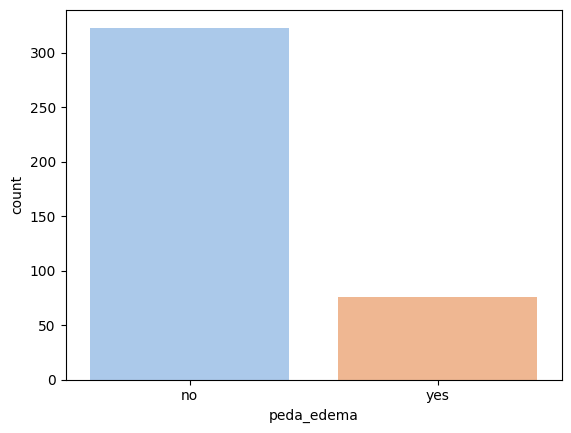

In [68]:
sns.countplot(x=df['peda_edema'], palette='pastel')

In [69]:
df['bacteria']

0      notpresent
1      notpresent
2      notpresent
3      notpresent
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: bacteria, Length: 400, dtype: object

<Axes: xlabel='bacteria', ylabel='count'>

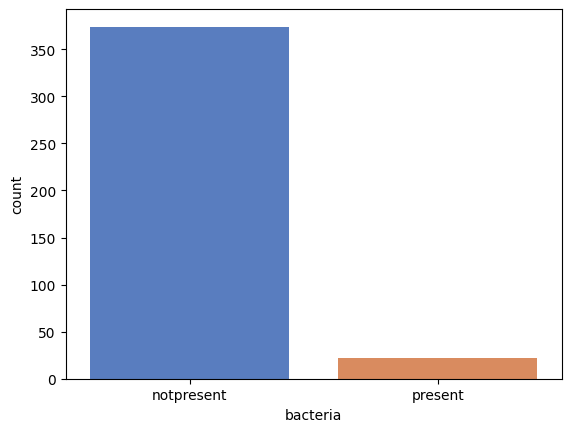

In [70]:
sns.countplot(x=df['bacteria'], palette='muted')

In [71]:
# insights >> In majority of the people bacteria is not present

In [72]:
# BIVARIATE ANALYSIS

In [73]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

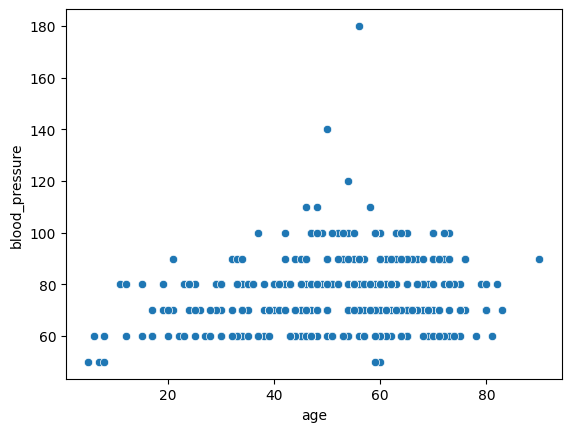

In [74]:
sns.scatterplot(data=df, x='age', y='blood_pressure')
plt.show()

In [75]:
# Insights >> As age is increasing bp is also increasing

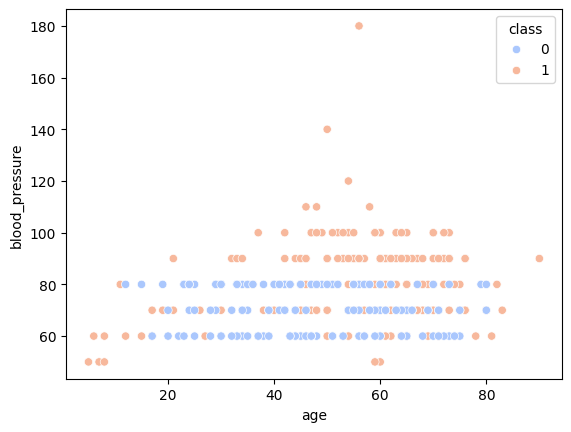

In [76]:
sns.scatterplot(data=df, x='age', y='blood_pressure', hue='class', palette='coolwarm')
plt.show()

In [77]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

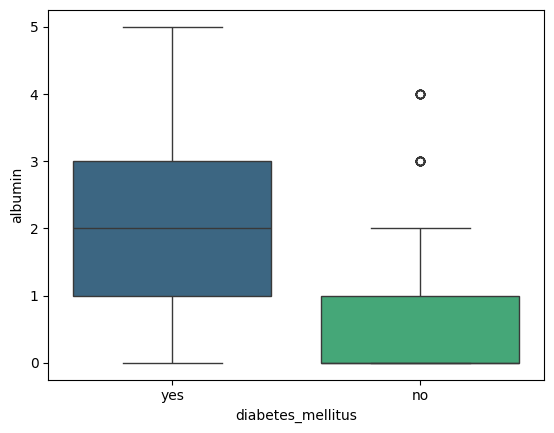

In [78]:
sns.boxplot(data=df, x='diabetes_mellitus', y='albumin', palette='viridis')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

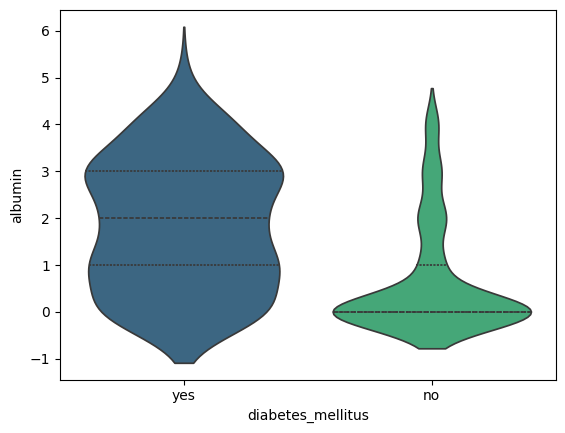

In [79]:
sns.violinplot(data=df, x='diabetes_mellitus', y='albumin', palette='viridis', inner='quartile')


In [211]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [221]:
# Stacked bar chart >> diabetes_mellitus and hypertension

# crosstab summarises the data
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])


In [223]:
diabetes_hypertension

hypertension        no  yes
diabetes_mellitus          
no                 220   41
yes                 31  106

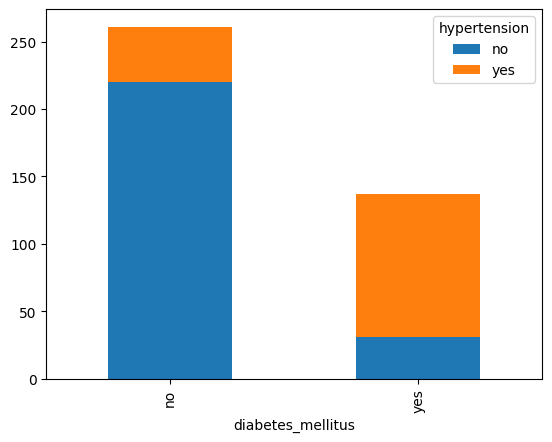

In [227]:
diabetes_hypertension.plot(kind='bar', stacked=True)
plt.show()

In [229]:
# MULTIVARIATE ANALYSIS


In [231]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [233]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
df[cols]

age  blood_pressure  blood_glucose_random  serum_creatinine  class
0    48.0            80.0                 121.0               1.2      1
1     7.0            50.0                   NaN               0.8      1
2    62.0            80.0                 423.0               1.8      1
3    48.0            70.0                 117.0               3.8      1
4    51.0            80.0                 106.0               1.4      1
..    ...             ...                   ...               ...    ...
395  55.0            80.0                 140.0               0.5      0
396  42.0            70.0                  75.0               1.2      0
397  12.0            80.0                 100.0               0.6      0
398  17.0            60.0                 114.0               1.0      0
399  58.0            80.0                 131.0               1.1      0

[400 rows x 5 columns]

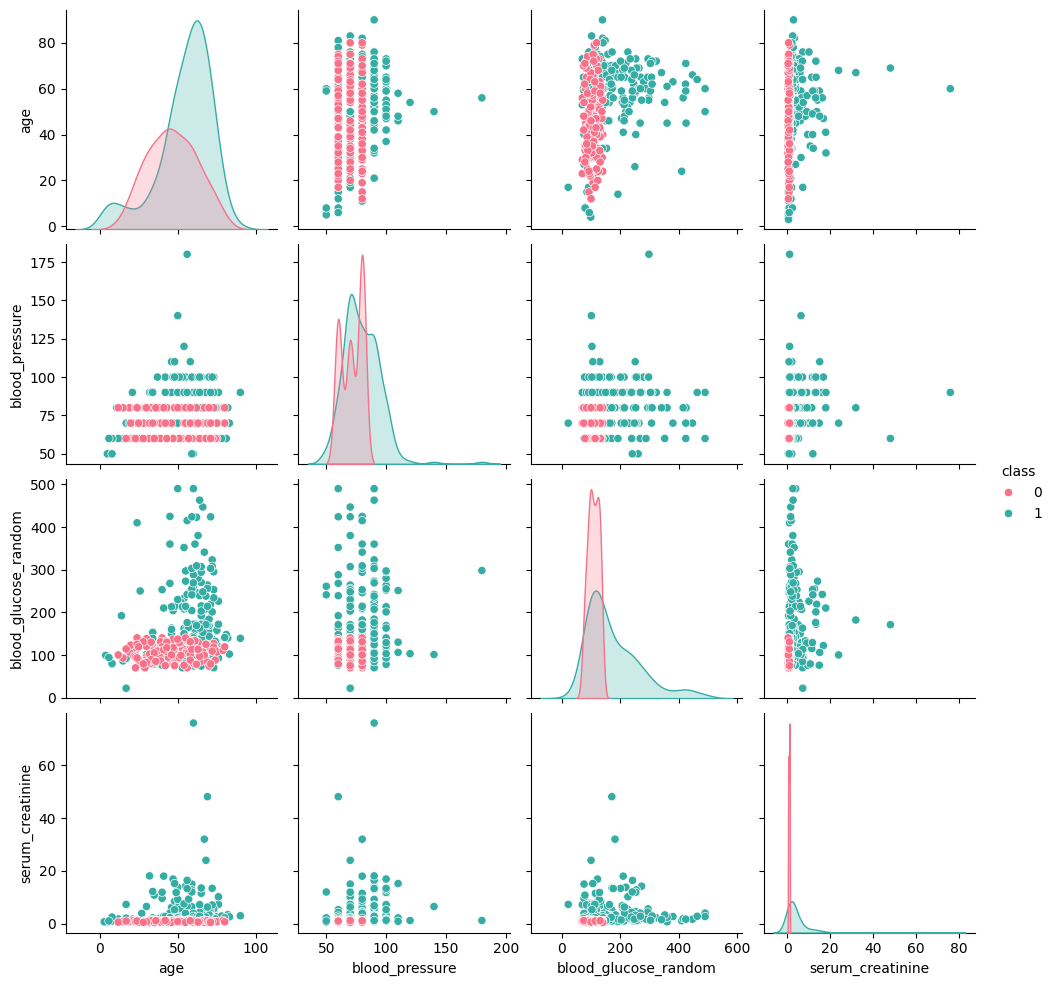

In [247]:
sns.pairplot(df[cols], hue='class', palette='husl')

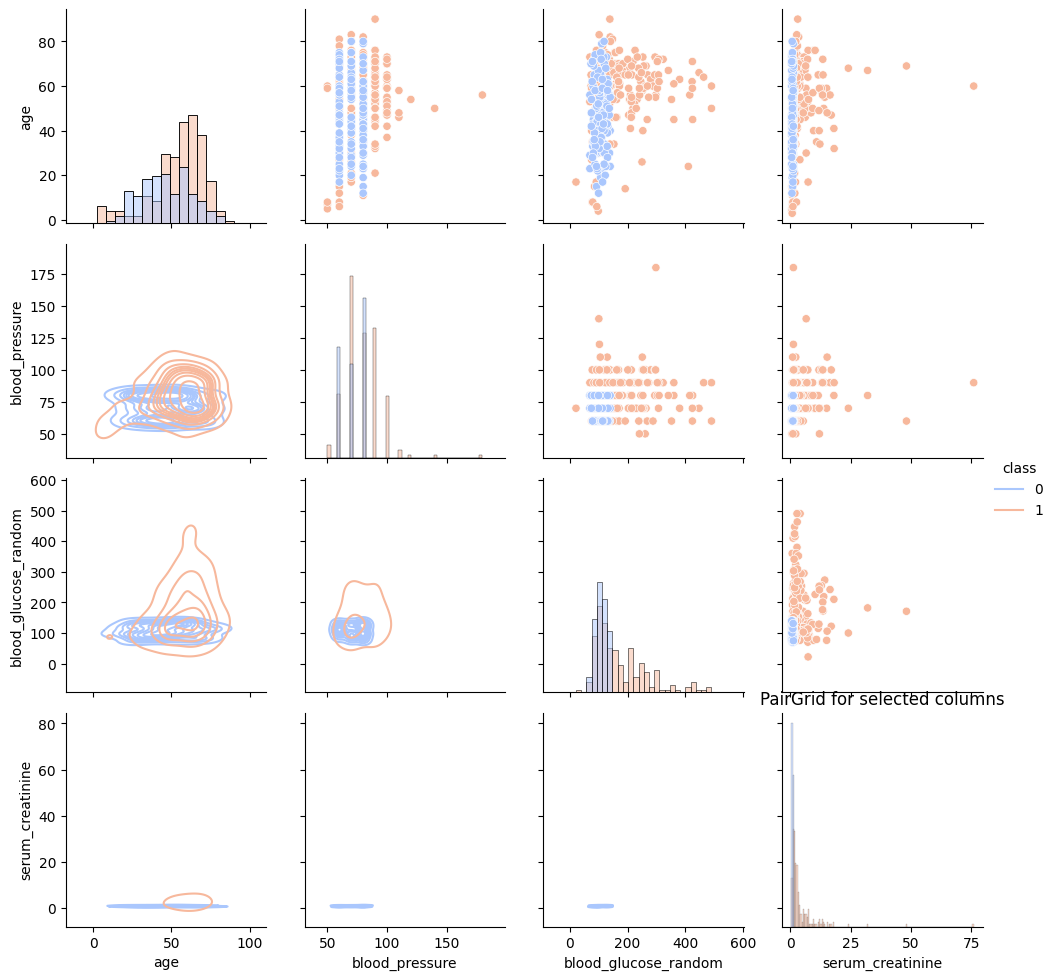

In [253]:
# customized upper plot
g = sns.PairGrid(df[cols], hue='class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

In [255]:
df.corr(numeric_only=True)

age  blood_pressure  specific_gravity   albumin  \
age                     1.000000        0.159480         -0.191096  0.122091   
blood_pressure          0.159480        1.000000         -0.218836  0.160689   
specific_gravity       -0.191096       -0.218836          1.000000 -0.469760   
albumin                 0.122091        0.160689         -0.469760  1.000000   
sugar                   0.220866        0.222576         -0.296234  0.269305   
blood_glucose_random    0.244992        0.160193         -0.374710  0.379464   
blood_urea              0.196985        0.188517         -0.314295  0.453528   
serum_creatinine        0.132531        0.146222         -0.361473  0.399198   
sodium                 -0.100046       -0.116422          0.412190 -0.459896   
potassium               0.058377        0.075151         -0.072787  0.129038   
haemoglobin            -0.192928       -0.306540          0.602582 -0.634632   
packed_cell_volume     -0.242119       -0.326319          0.603560 -0.611891   
white_blood_cell_count  0.118339        0.029753         -0.236215  0.231989   
red_blood_cell_count   -0.268896       -0.261936          0.579476 -0.566437   
class                   0.227268        0.294077         -0.732163  0.627090   

                           sugar  blood_glucose_random  blood_urea  \
age                     0.220866              0.244992    0.196985   
blood_pressure          0.222576              0.160193    0.188517   
specific_gravity       -0.296234             -0.374710   -0.314295   
albumin                 0.269305              0.379464    0.453528   
sugar                   1.000000              0.717827    0.168583   
blood_glucose_random    0.717827              1.000000    0.143322   
blood_urea              0.168583              0.143322    1.000000   
serum_creatinine        0.223244              0.114875    0.586368   
sodium                 -0.131776             -0.267848   -0.323054   
potassium               0.219450              0.066966    0.357049   
haemoglobin            -0.224775             -0.306189   -0.610360   
packed_cell_volume     -0.239189             -0.301385   -0.607621   
white_blood_cell_count  0.184893              0.150015    0.050462   
red_blood_cell_count   -0.237448             -0.281541   -0.579087   
class                   0.344070              0.419672    0.380605   

                        serum_creatinine    sodium  potassium  haemoglobin  \
age                             0.132531 -0.100046   0.058377    -0.192928   
blood_pressure                  0.146222 -0.116422   0.075151    -0.306540   
specific_gravity               -0.361473  0.412190  -0.072787     0.602582   
albumin                         0.399198 -0.459896   0.129038    -0.634632   
sugar                           0.223244 -0.131776   0.219450    -0.224775   
blood_glucose_random            0.114875 -0.267848   0.066966    -0.306189   
blood_urea                      0.586368 -0.323054   0.357049    -0.610360   
serum_creatinine                1.000000 -0.690158   0.326107    -0.401670   
sodium                         -0.690158  1.000000   0.097887     0.365183   
potassium                       0.326107  0.097887   1.000000    -0.133746   
haemoglobin                    -0.401670  0.365183  -0.133746     1.000000   
packed_cell_volume             -0.404193  0.376914  -0.163182     0.895382   
white_blood_cell_count         -0.006390  0.007277  -0.105576    -0.169413   
red_blood_cell_count           -0.400852  0.344873  -0.158309     0.798880   
class                           0.299969 -0.375674   0.084541    -0.768919   

                        packed_cell_volume  white_blood_cell_count  \
age                              -0.242119                0.118339   
blood_pressure                   -0.326319                0.029753   
specific_gravity                  0.603560               -0.236215   
albumin                          -0.611891                0.231989   
sugar                       

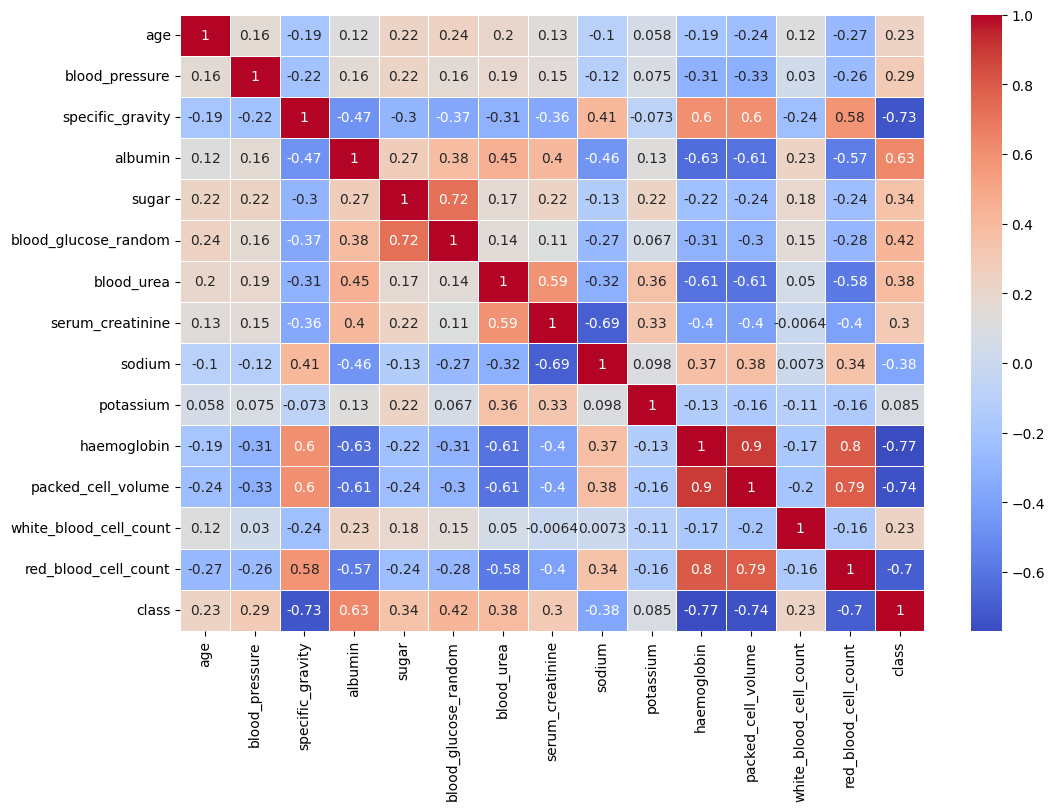

In [259]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

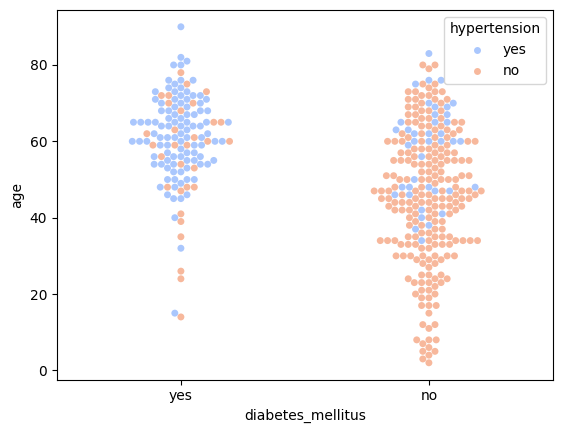

In [263]:
sns.swarmplot(data=df, x=df['diabetes_mellitus'], y=df['age'], hue=df['hypertension'], palette='coolwarm')

In [269]:
# Swarm plot allows you to see the overlapped data as well

In [271]:
import plotly as px

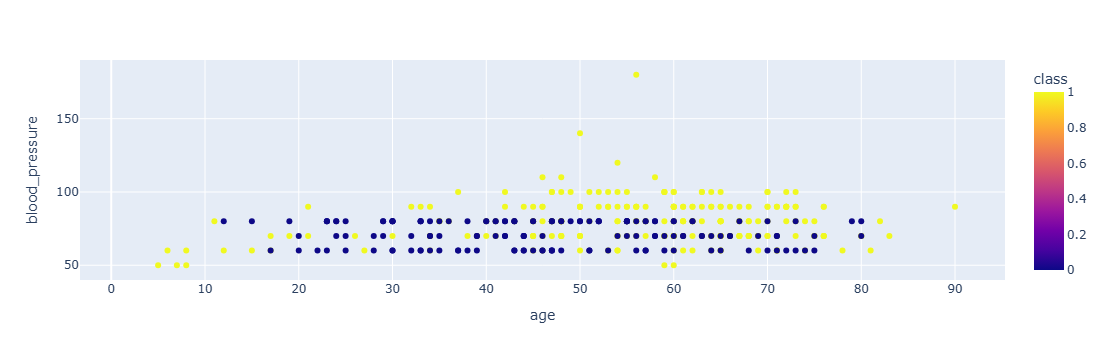

In [291]:
fig = px.scatter(df, x='age', y='blood_pressure', color='class')
fig.show()

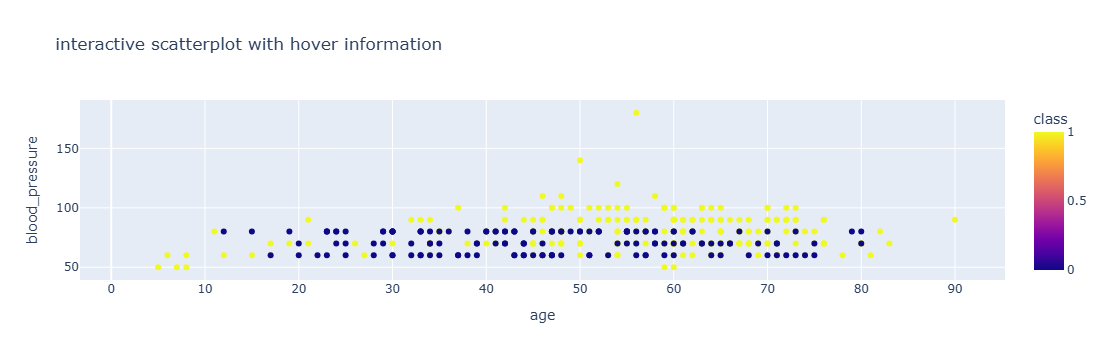

In [303]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data = ['serum_creatinine', 'haemoglobin'],title = "interactive scatterplot with hover information")
fig.show()

In [293]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

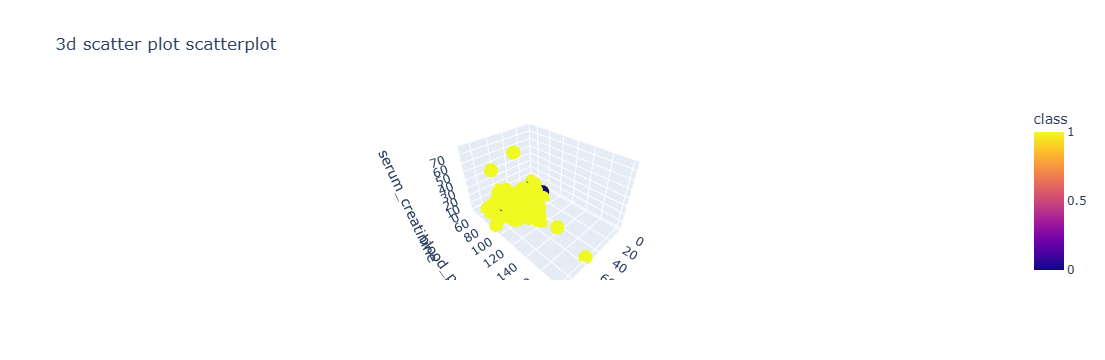

In [306]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure',z = 'serum_creatinine', color = 'class', title = "3d scatter plot scatterplot")
fig.show()

In [308]:
import plotly.graph_objects as go

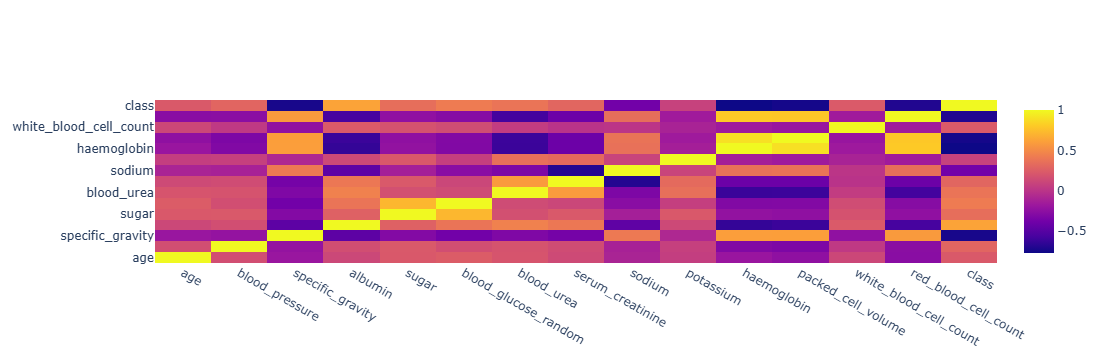

In [310]:
data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.values,
                          x = data_corr.columns,
                          y=data_corr.index))
fig.show()

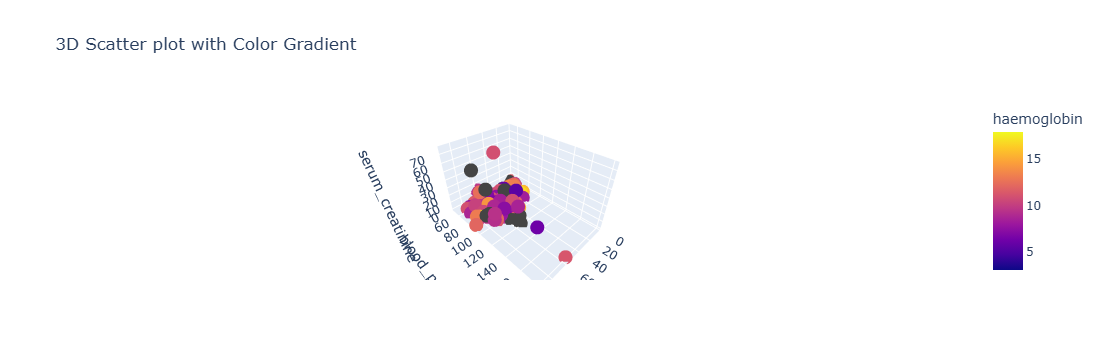

In [312]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()

In [318]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [320]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [322]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [324]:
# replace with mean, median for numerical columns
df[num_col]

age  blood_pressure  specific_gravity  albumin  sugar  \
0    48.0            80.0             1.020      1.0    0.0   
1     7.0            50.0             1.020      4.0    0.0   
2    62.0            80.0             1.010      2.0    3.0   
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

     blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
0                   121.0        36.0               1.2     NaN        NaN   
1                     NaN        18.0               0.8     NaN        NaN   
2                   423.0        53.0               1.8     NaN        NaN   
3                   117.0        56.0               3.8   111.0        2.5   
4                   106.0        26.0               1.4     NaN        NaN   
..                    ...         ...               ...     ...        ...   
395                 140.0        49.0               0.5   150.0        4.9   
396                  75.0        31.0               1.2   141.0        3.5   
397                 100.0        26.0               0.6   137.0        4.4   
398                 114.0        50.0               1.0   135.0        4.9   
399                 131.0        18.0               1.1   141.0        3.5   

     haemoglobin  packed_cell_volume  white_blood_cell_count  \
0           15.4                44.0                  7800.0   
1           11.3                38.0                  6000.0   
2            9.6                31.0                  7500.0   
3           11.2                32.0                  6700.0   
4           11.6                35.0                  7300.0   
..           ...                 ...                     ...   
395         15.7                47.0                  6700.0   
396         16.5                54.0                  7800.0   
397         15.8                49.0                  6600.0   
398         14.2                51.0                  7200.0   
399         15.8                53.0                  6800.0   

     red_blood_cell_count  
0                     5.2  
1                     NaN  
2                     NaN  
3                     3.9  
4                     4.6  
..                    ...  
395                   4.9  
396                   6.2  
397                   5.4  
398                   5.9  
399                   6.1  

[400 rows x 14 columns]

In [328]:
median_values = df[num_col].median()

In [330]:
median_values

age                         55.00
blood_pressure              80.00
specific_gravity             1.02
albumin                      0.00
sugar                        0.00
blood_glucose_random       121.00
blood_urea                  42.00
serum_creatinine             1.30
sodium                     138.00
potassium                    4.40
haemoglobin                 12.65
packed_cell_volume          40.00
white_blood_cell_count    8000.00
red_blood_cell_count         4.80
dtype: float64

In [332]:
df[num_col]=df[num_col].fillna(median_values)

In [334]:
df[num_col].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [340]:
mode_values=df.mode().iloc[0]

In [342]:
mode_values

age                              55.0
blood_pressure                   80.0
specific_gravity                 1.02
albumin                           0.0
sugar                             0.0
red_blood_cells                normal
pus_cell                       normal
pus_cell_clumps            notpresent
bacteria                   notpresent
blood_glucose_random            121.0
blood_urea                       42.0
serum_creatinine                  1.2
sodium                          138.0
potassium                         4.4
haemoglobin                     12.65
packed_cell_volume               40.0
white_blood_cell_count         8000.0
red_blood_cell_count              4.8
hypertension                       no
diabetes_mellitus                  no
coronary_artery_disease            no
appetite                         good
peda_edema                         no
aanemia                            no
class                               1
Name: 0, dtype: object

In [344]:
df[cat_col]=df[cat_col].fillna(mode_values)

In [346]:
df[cat_col]  

red_blood_cells  pus_cell pus_cell_clumps    bacteria hypertension  \
0            normal    normal      notpresent  notpresent          yes   
1            normal    normal      notpresent  notpresent           no   
2            normal    normal      notpresent  notpresent           no   
3            normal  abnormal         present  notpresent          yes   
4            normal    normal      notpresent  notpresent           no   
..              ...       ...             ...         ...          ...   
395          normal    normal      notpresent  notpresent           no   
396          normal    normal      notpresent  notpresent           no   
397          normal    normal      notpresent  notpresent           no   
398          normal    normal      notpresent  notpresent           no   
399          normal    normal      notpresent  notpresent           no   

    diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia  \
0                 yes                      no     good         no      no   
1                  no                      no     good         no      no   
2                 yes                      no     poor         no     yes   
3                  no                      no     poor        yes     yes   
4                  no                      no     good         no      no   
..                ...                     ...      ...        ...     ...   
395                no                      no     good         no      no   
396                no                      no     good         no      no   
397                no                      no     good         no      no   
398                no                      no     good         no      no   
399                no                      no     good         no      no   

     class  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
395      0  
396      0  
397      0  
398      0  
399      0  

[400 rows x 11 columns]

In [348]:
df[cat_col].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [350]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [352]:
# few columns are object columns >> convert object to numerical

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])

In [354]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 121.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  aanemia  class  
0           0        0      1  
1           0        0      1  
2           0        1      1  
3           1        1      1  
4           0        0      1  

[5 rows x 25 columns]

In [356]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetes_mellitus            int32
coronary_artery_disease      int32
appetite                     int32
peda_edema                   int32
aanemia                      int32
class                        int64
dtype: object